# Data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv("Data.csv")

# Katagorisering af opslag

In [72]:
def categorize_content(content):
    if pd.isna(content):
        return "billeder og andet"
    
    content_lower = content.lower()
    
    reklame_keywords = [
        "køb", "salg", "reklame", "annoncering", "tilbud", "kampagne", 
        "bog", "kr", "bogen", "kr.", "sælg", "pris", "billigt", 
        "eksemplar", "nyhed", "udgivelse", "bestilling", "gratis", "udsolgt",
        "rabatter", "bestil nu", "tilgængelig", "lager", "vare", "produkt", "butik", "radio"
    ]
    
    slaegthistorie_keywords = [
        "slægt", "familie", "genealogi", "oldefar", "farfar", "bedstefar", 
        "bedstemor", "mormor", "morfar", "farmor", "far", "mor", "oldemor", 
        "efterslægt", "forfader", "slægtninge", "stamtræ", "slægtsforskning",
        "familietræ", "aneforældre", "afstamning", "slægtsbog", "familiekrønike", "slægtskab", "mand", "kone"
    ]
    
    historisk_analyse_keywords = [
        "analyse", "historisk", "kilde", "undersøgelse", "dokumentation", 
        "kilder", "historie", "arkiv", "rapport", "undersøge", "artikel", 
        "optegnelse", "forskning", "opgave", "analysemetode",
        "historiker", "tidslinje", "epoke", "periode", "historiske data", "arkæologi", "kronologi"
    ]
    
    debat_keywords = [
        "debat", "mening", "diskussion", "synspunkt", "opfattelse", 
        "holdning", "perspektiv", "kritik", "kommentar", "input", 
        "respons", "opfordring", "råd", "dialog", "uenighed",
        "argument", "diskutere", "kontrovers", "emne", "forum", "synspunkter", "debatere"
    ]
    
    minde_keywords = [
        "minde", "erindring", "hyldest", "mindes", "årsdagen", 
        "begivenhed", "ceremoni", "mindehøjtidelighed", "afsked", 
        "begravelse", "tribut", "minder", "fejring", "højtidelighed",
        "årsminde", "mindeskrift", "nekrolog", "mindesten", "dødsfald", "mindelund", "4 maj"
    ]
    
    begivenhed_keywords = [
        "arrangement", "konference", "seminar", "møde", "workshop", "foredrag", "festival", "udstilling", "kulturnat"
    ]
    
    efterlysning_keywords = [
        "søger", "efterlysning", "leder efter", "nogen der kender"
    ]
    
    nyheder_keywords = [
        "nyheder", "opdatering", "meddelelse", "pressenyt", "aktuelle", "seneste", "breaking"
    ]
    
    hjælp_keywords = [
        "hjælp", "spørgsmål", "hvordan", "kan nogen", "vejledning", "rådgivning", "support", 
        "Er der nogen herinde", "hjælpe", "hjælp til", "kan nogen hjælpe"
    ]
    
    krigshistorie_keywords = [
        "krig", "tysk", "1945", "modstand", "BBC", "soldater", "besættelse", "kamp", "frihed", "englænderne", "modstandsmand"
    ]
    
    kultur_og_kunst_keywords = [
        "kunst", "tegning", "maleri", "kultur", "bøger", "forfatter", "litteratur", "udstilling", "skulptur", "kunstner"
    ]
    
    if any(keyword in content_lower for keyword in reklame_keywords):
        return "reklame"
    elif any(keyword in content_lower for keyword in slaegthistorie_keywords):
        return "slægtshistorie"
    elif any(keyword in content_lower for keyword in historisk_analyse_keywords):
        return "historisk analyse"
    elif any(keyword in content_lower for keyword in debat_keywords):
        return "debat"
    elif any(keyword in content_lower for keyword in minde_keywords):
        return "minde"
    elif any(keyword in content_lower for keyword in begivenhed_keywords):
        return "begivenhed"
    elif any(keyword in content_lower for keyword in efterlysning_keywords):
        return "efterlysning"
    elif any(keyword in content_lower for keyword in nyheder_keywords):
        return "nyheder"
    elif any(keyword in content_lower for keyword in hjælp_keywords):
        return "hjælp"
    elif any(keyword in content_lower for keyword in krigshistorie_keywords):
        return "krigshistorie"
    elif any(keyword in content_lower for keyword in kultur_og_kunst_keywords):
        return "kultur og kunst"
    else:
        return "billeder og andet"

data['Category'] = data['Content'].apply(categorize_content)

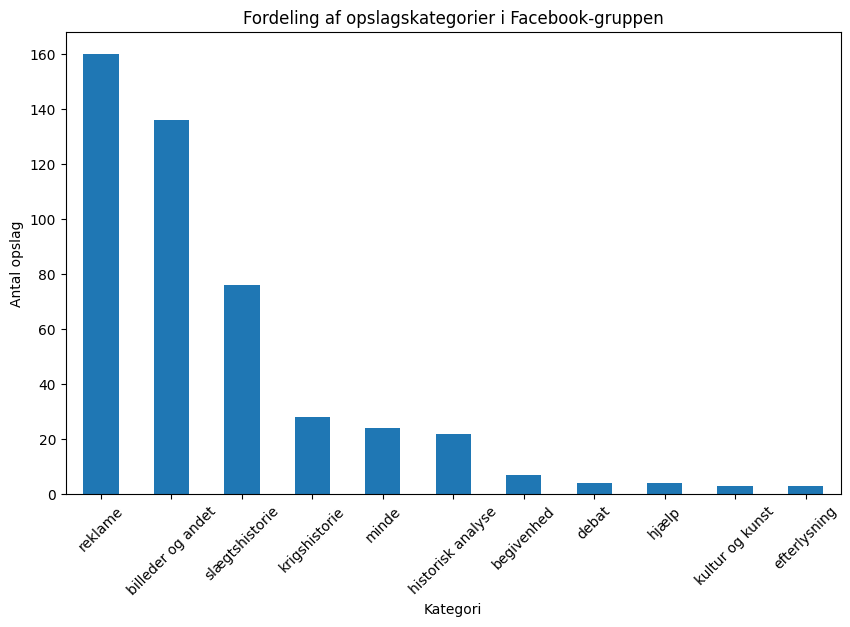

In [73]:
category_counts = data['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Fordeling af opslagskategorier i Facebook-gruppen')
plt.xlabel('Kategori')
plt.ylabel('Antal opslag')
plt.xticks(rotation=45)
plt.show()


In [98]:
data['Comments'] = pd.to_numeric(data['Comments'], errors='coerce').fillna(0)
data['Reactions'] = pd.to_numeric(data['Reactions'], errors='coerce').fillna(0)

category_stats = data.groupby('Category').agg(
    avg_comments=('Comments', 'mean'),
    avg_reactions=('Reactions', 'mean')
).sort_values(by=['avg_comments', 'avg_reactions'], ascending=[False, False])

category_stats


,avg_comments,avg_reactions
Category,,
minde,0.0,96.416667
slægtshistorie,0.0,70.921053
krigshistorie,0.0,62.928571
billeder og andet,0.0,45.117647
kultur og kunst,0.0,42.000000
reklame,0.0,35.343750
efterlysning,0.0,25.333333
historisk analyse,0.0,24.681818
debat,0.0,21.250000


<Figure size 1000x600 with 0 Axes>

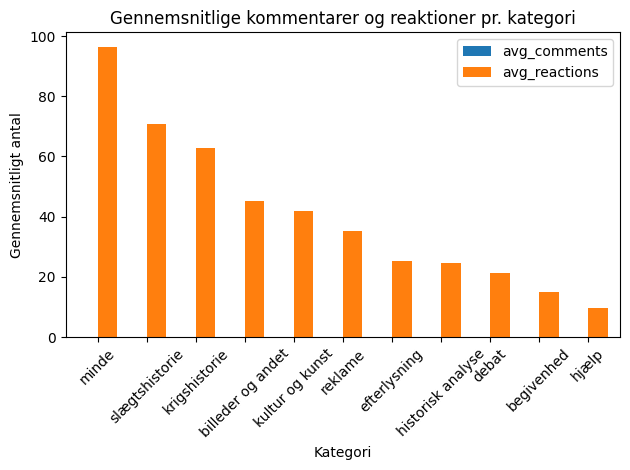

In [99]:
plt.figure(figsize=(10, 6))
category_stats.plot(kind='bar', width=0.8)
plt.title("Gennemsnitlige kommentarer og reaktioner pr. kategori")
plt.xlabel("Kategori")
plt.ylabel("Gennemsnitligt antal")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Mest Aktive Medlemmer

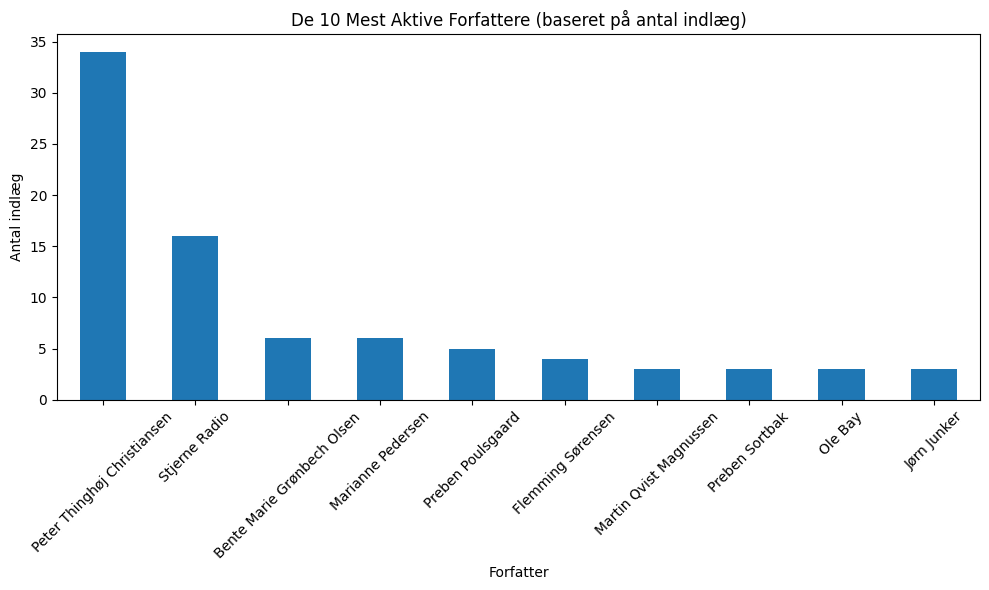

In [68]:

author_counts = data['Author'].value_counts()

plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar')
plt.title("De 10 Mest Aktive Forfattere (baseret på antal indlæg)")
plt.xlabel("Forfatter")
plt.ylabel("Antal indlæg")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 10 mest aktive forfattere udgør 27,1% af det samlede antal opslag